In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Fairness, node2vec correlation - Random sources

In [56]:
# Load all edges.
df = pd.read_csv('edgesScoresRandom.txt', sep= '\t', usecols= ['gain', 'node2vecRecommendationScore'])

In [12]:
fairness = df['gain'].to_numpy()

In [15]:
recScore = df['node2vecRecommendationScore'].to_numpy()

<IPython.core.display.Javascript object>


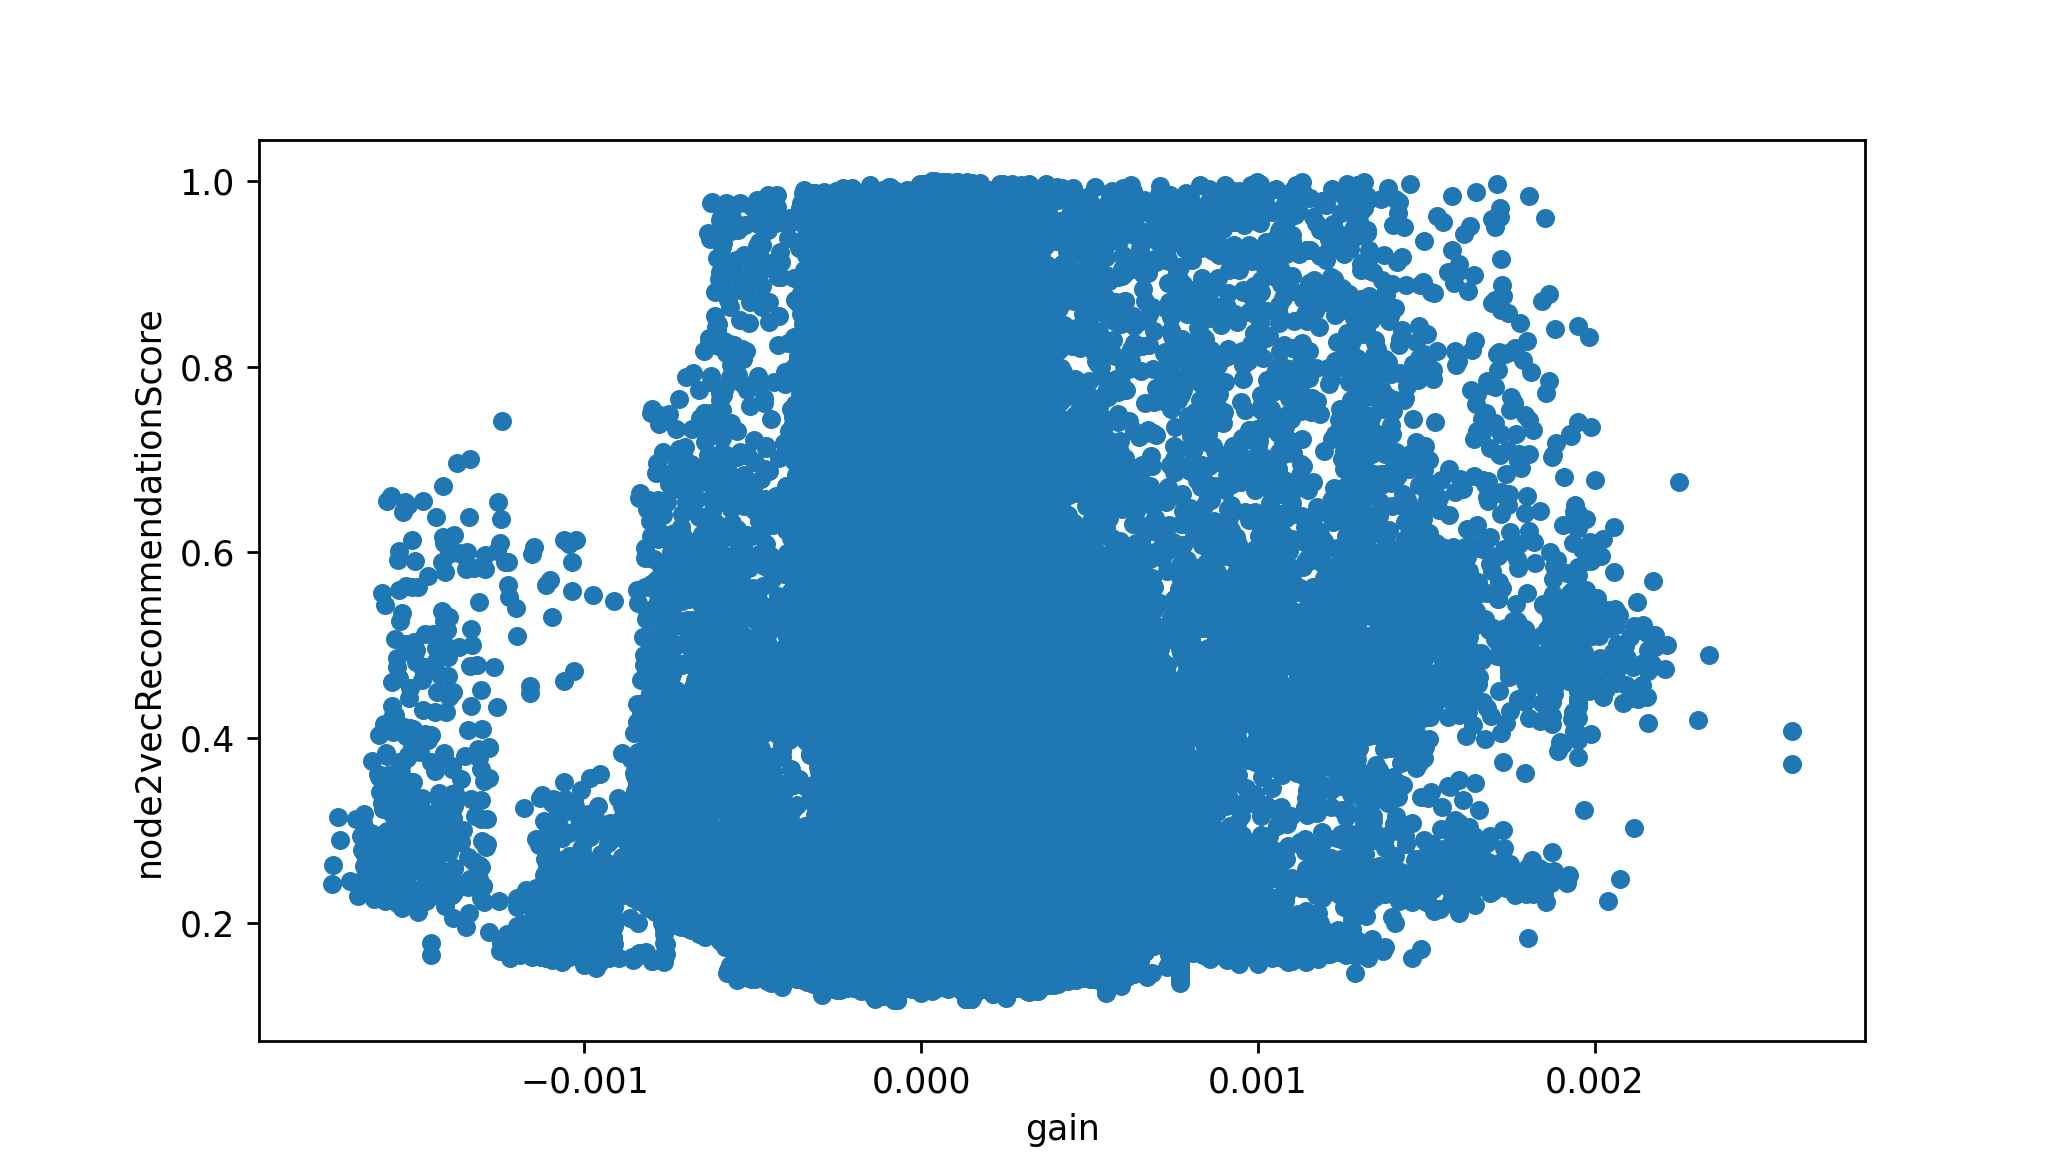

In [19]:
df.plot(x= 'gain', y= 'node2vecRecommendationScore', kind= 'scatter')

In [22]:
# Different policies.
policies = ['Node2vec', 'ResourceAllocation', 'PreferencialAttachment', 'JaccardCoefficient', 'Gain', 'ExpGain', 
           'AdamicAdar', 'Random']

In [29]:
dfs = dict()
for policy in policies:
    dfs[policy] = pd.read_csv("edgesSelectedBy%sRandomSources.txt" %policy, sep= '\t', usecols= ['gain', 'node2vecScore'])

<IPython.core.display.Javascript object>


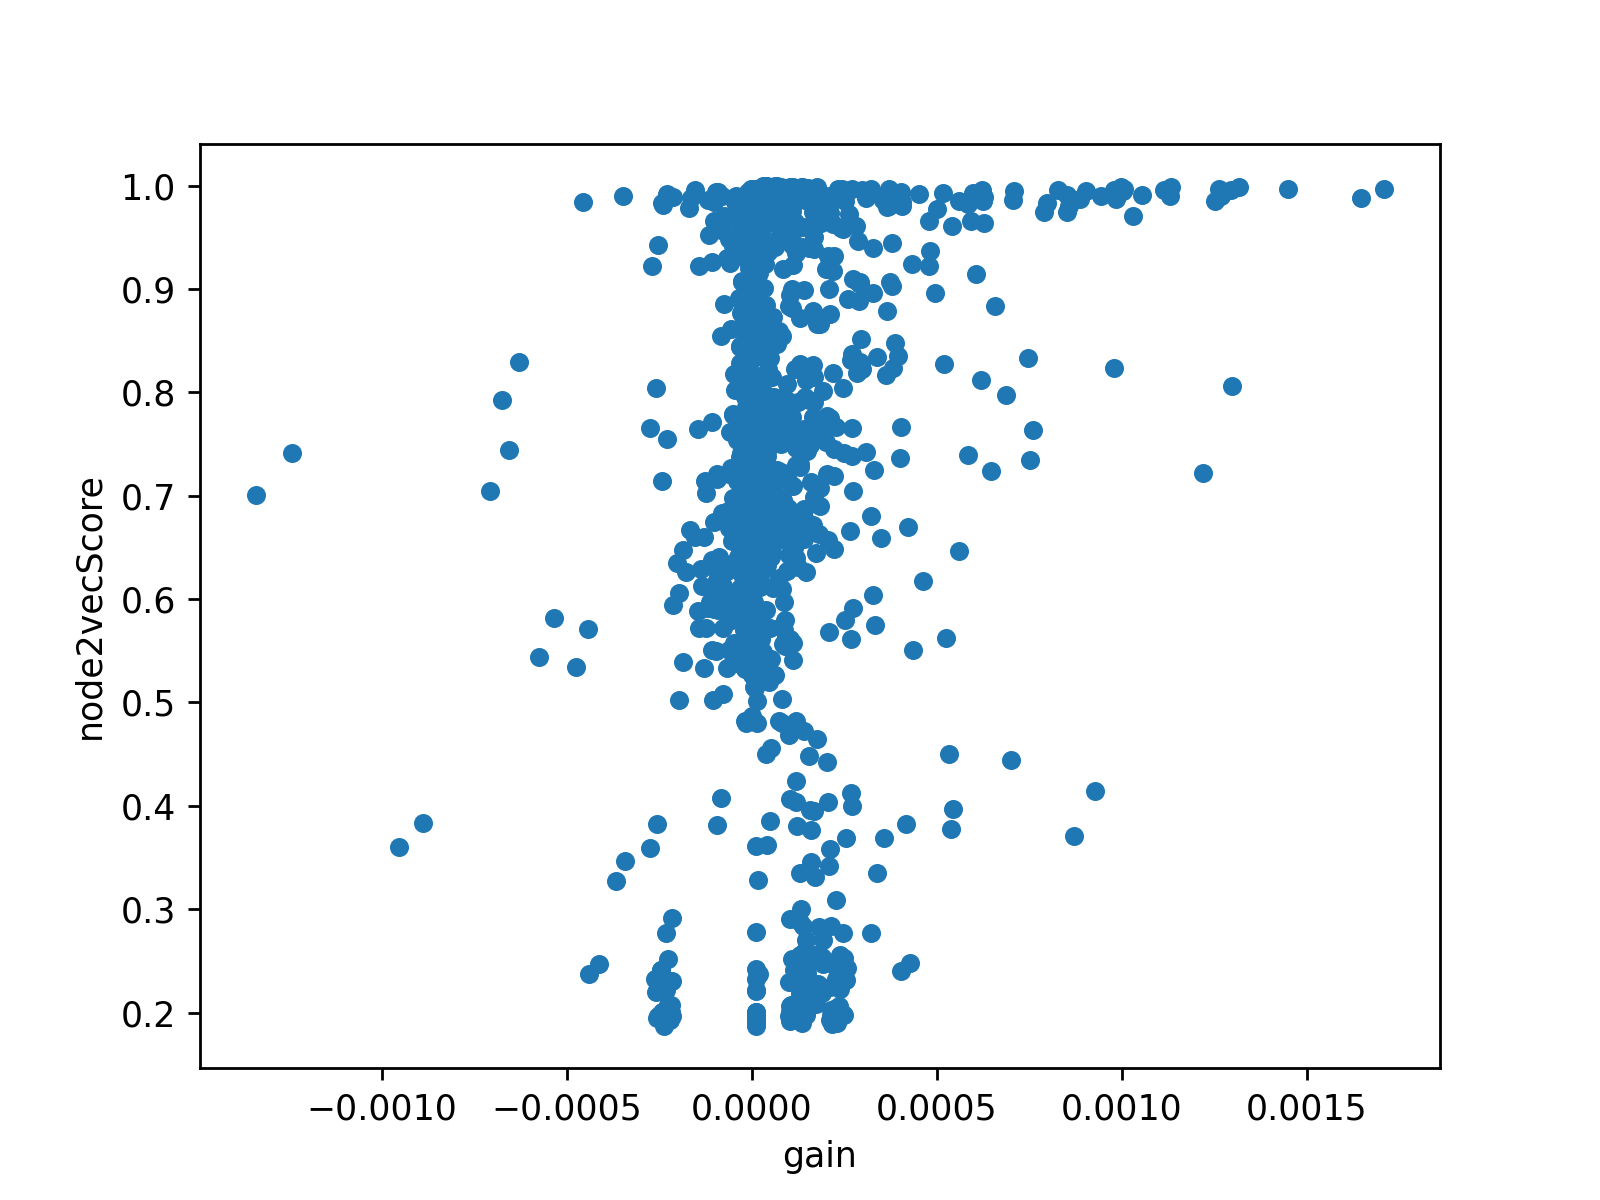

In [33]:
dfs[policies[0]].plot(x= 'gain', y= 'node2vecScore', kind= 'scatter')

<IPython.core.display.Javascript object>


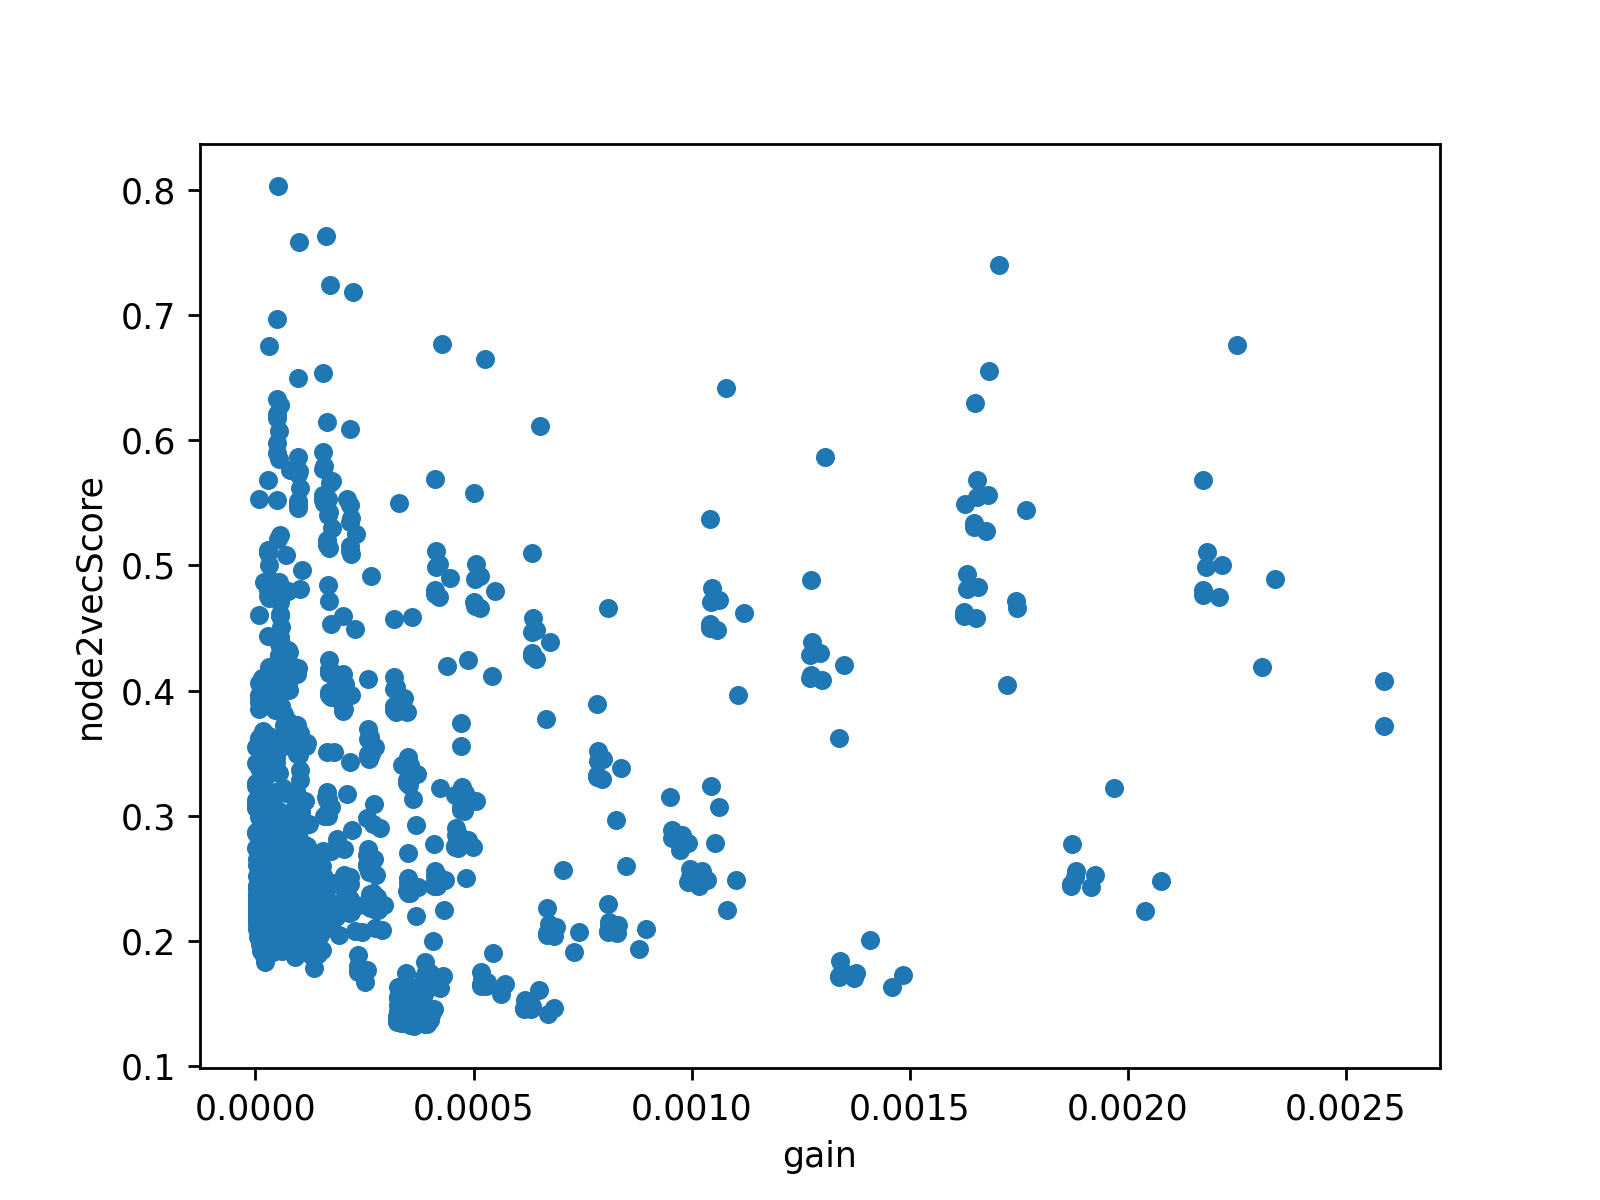

In [34]:
dfs[policies[4]].plot(x= 'gain', y= 'node2vecScore', kind= 'scatter')

In [51]:
testsorted = dfs[policies[0]].sort_values(axis= 0, ascending= False, by='gain')
testdf = testsorted.rolling(window= 50, min_periods= 1 ).mean()

In [52]:
testsorted.head()

,node2vecScore,gain
218,0.996758,0.001708
950,0.987879,0.001646
340,0.996422,0.001450
191,0.998703,0.001316
310,0.806196,0.001297


In [53]:
testdf


,node2vecScore,gain
218,0.996758,0.001708
950,0.992319,0.001677
340,0.993686,0.001601
191,0.994941,0.001530
310,0.957192,0.001483
...,...,...
1218,0.456813,-0.000314
565,0.452606,-0.000328
1175,0.455872,-0.000343
554,0.466097,-0.000363


<IPython.core.display.Javascript object>


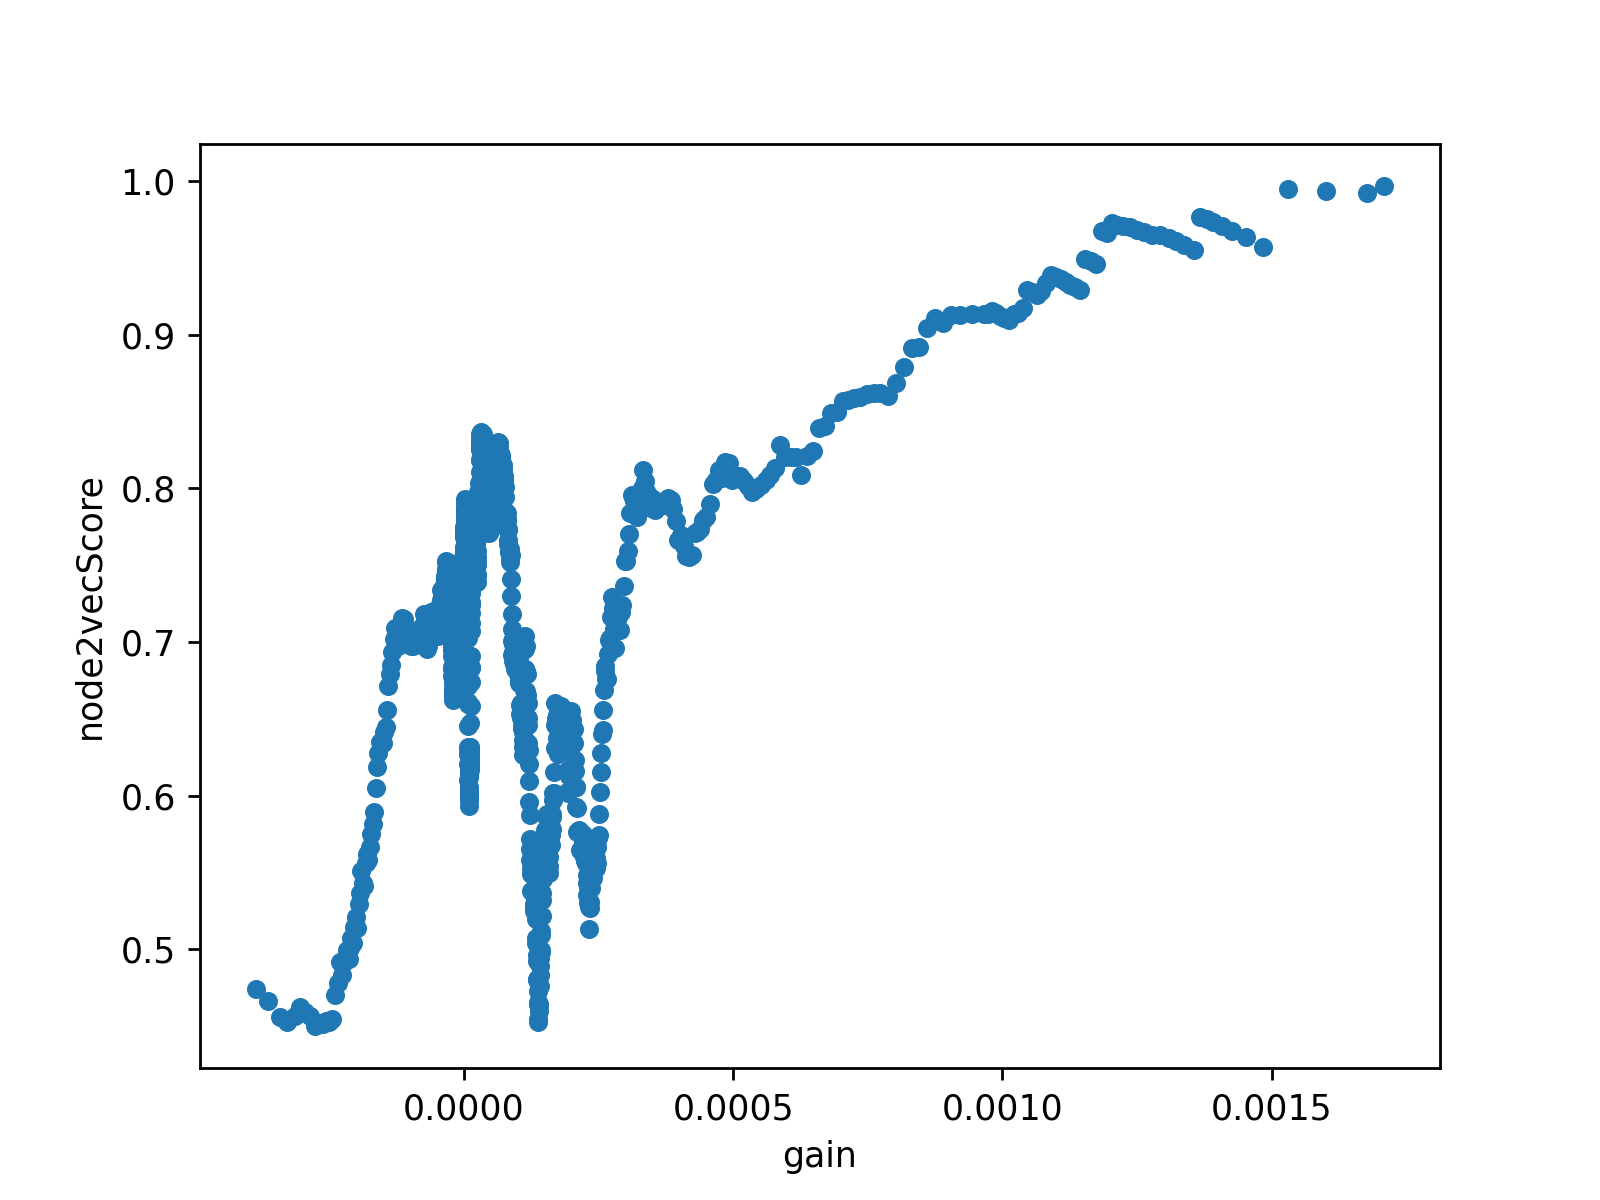

In [54]:
testdf.plot(x= 'gain', y= 'node2vecScore', kind= 'scatter')